In [8]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from celluloid import Camera # getting the camera
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image.dataframe_iterator import DataFrameIterator
from matplotlib.offsetbox import ( OffsetImage,
                                  AnnotationBbox)
from IPython.display import HTML # to show the animation in Jupyter
import seaborn as sns
import itertools
import os
import shutil
import random
from google.colab import files 
import cv2
import glob
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Research")
# os.chdir("/content/drive/MyDrive/Research")
!pwd

/content/drive/MyDrive/Colab Notebooks/Research


In [3]:
# Experiment Environment Setup
files.upload()
!mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

Saving kaggle.json to kaggle.json
100% 742M/745M [00:07<00:00, 102MB/s]
100% 745M/745M [00:07<00:00, 105MB/s]


In [ ]:
! unzip covid19-radiography-database.zip 

In [3]:
base = '/content/COVID-19_Radiography_Dataset'
paths   = os.listdir(base)

In [16]:
# We are creating our test set
ls = {'path':[],'imageid':[],'class':[],'mean':[],'std':[],'min':[],'max':[],'image':[]}
if os.path.isdir(base) is True:
    paths   = os.listdir(base)
    pr =  10.
    for k in range(len(paths)):
        if os.path.isdir(os.path.join(base,paths[k])):
          for f in os.listdir(os.path.join(base,paths[k])):
            file =  os.path.join(os.path.join(base,paths[k]),f)
            arr_img = cv2.imread(file)
            mean = arr_img.mean()
            std = arr_img.std()
            minimum = arr_img.min()
            maximum = arr_img.max()
            clas =  f.split('/')[-1].split('.')
            classes =  clas[0].split('-')[0]
            imid =  clas[0].split('-')[1]
            ls['path'].append(file)
            ls['imageid'].append(imid)
            ls['class'].append(classes)
            ls['mean'].append(mean)
            ls['std'].append(std)
            ls['min'].append(minimum)
            ls['max'].append(maximum)
            ls['image'].append(arr_img)

In [17]:
df  = pd.DataFrame(ls)
df.head()

,path,imageid,class,mean,std,min,max,image
0,/content/COVID-19_Radiography_Dataset/Normal/N...,860,Normal,140.805271,52.375652,0,255,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,/content/COVID-19_Radiography_Dataset/Normal/N...,1242,Normal,131.418754,61.839314,0,252,"[[[45, 45, 45], [50, 50, 50], [52, 52, 52], [5..."
2,/content/COVID-19_Radiography_Dataset/Normal/N...,4275,Normal,118.040693,65.426699,0,252,"[[[17, 17, 17], [15, 15, 15], [13, 13, 13], [1..."
3,/content/COVID-19_Radiography_Dataset/Normal/N...,9792,Normal,175.171396,59.180007,0,255,"[[[104, 104, 104], [103, 103, 103], [93, 93, 9..."
4,/content/COVID-19_Radiography_Dataset/Normal/N...,6604,Normal,100.180736,67.181756,0,255,"[[[5, 5, 5], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."


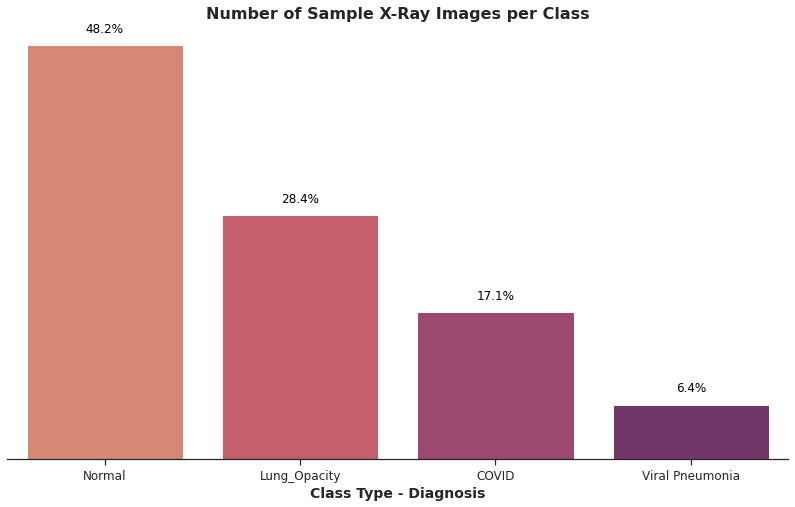

In [18]:
samples,features = df.shape
#Samples per class
plt.figure(figsize=(14,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = df,x='class',order = df['class'].value_counts().index,palette="flare")
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Class Type - Diagnosis',fontsize = 14,weight = 'bold')
ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False) 
plt.title('Number of Sample X-Ray Images per Class', fontsize = 16,weight = 'bold');


for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/samples)), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
    ha='center', va='bottom', color='black', xytext=(0, 10),rotation = 'horizontal',
    textcoords='offset points')

In [10]:
# df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

In [19]:
df.head()

,path,imageid,class,mean,std,min,max,image
0,/content/COVID-19_Radiography_Dataset/Normal/N...,860,Normal,140.805271,52.375652,0,255,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,/content/COVID-19_Radiography_Dataset/Normal/N...,1242,Normal,131.418754,61.839314,0,252,"[[[45, 45, 45], [50, 50, 50], [52, 52, 52], [5..."
2,/content/COVID-19_Radiography_Dataset/Normal/N...,4275,Normal,118.040693,65.426699,0,252,"[[[17, 17, 17], [15, 15, 15], [13, 13, 13], [1..."
3,/content/COVID-19_Radiography_Dataset/Normal/N...,9792,Normal,175.171396,59.180007,0,255,"[[[104, 104, 104], [103, 103, 103], [93, 93, 9..."
4,/content/COVID-19_Radiography_Dataset/Normal/N...,6604,Normal,100.180736,67.181756,0,255,"[[[5, 5, 5], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."


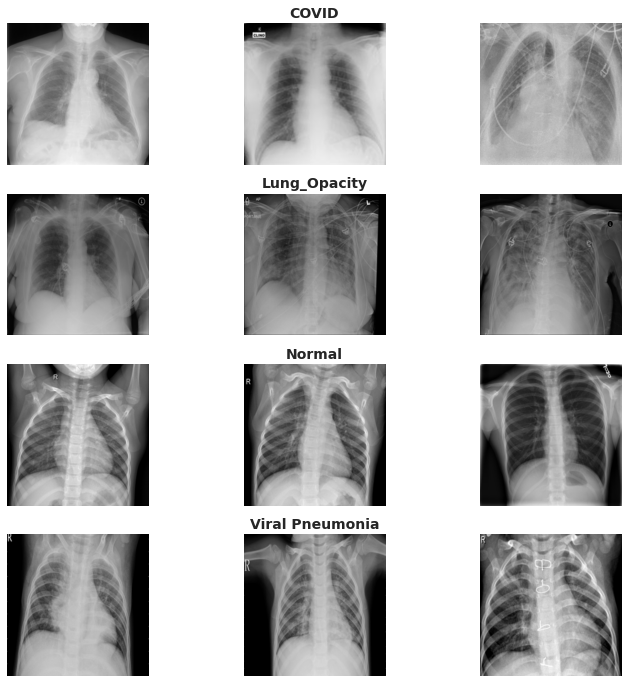

In [20]:
n_samples = 3

fig, m_axs = plt.subplots(4, n_samples, figsize = (4*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs,df.sort_values(['class']).groupby('class')):
    n_axs[1].set_title(type_name,fontsize = 14,weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

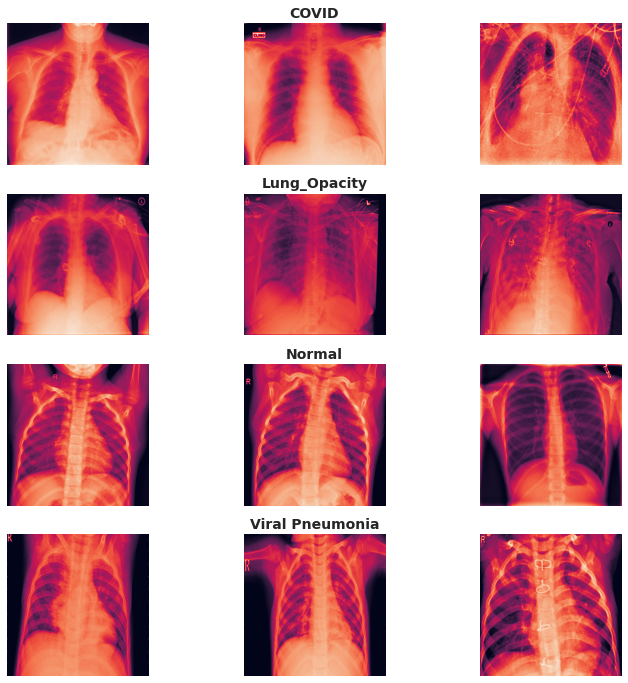

In [24]:
fig, m_axs = plt.subplots(4, n_samples, figsize = (4*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs,df.sort_values(['class']).groupby('class')):
    n_axs[1].set_title(type_name,fontsize = 14,weight = 'bold')
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):       
        picture = c_row['path']
        image = plt.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

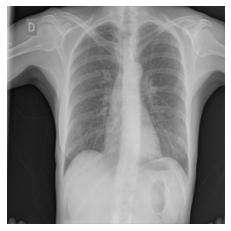

In [26]:
plt.figure()
pic_id = random.randrange(0, samples)
picture = df['path'][pic_id]
image = cv2.imread(picture)
plt.imshow(image)
plt.axis('off');
plt.show() 

In [27]:
print('Shape of the image : {}'.format(image.shape))
print('Image Hight {}'.format(image.shape[0]))
print('Image Width {}'.format(image.shape[1]))
print('Dimension of Image {}'.format(image.ndim))
print('Image size {}'.format(image.size))
print('Image Data Type {}'.format(image.dtype))
print('Maximum RGB value in this image {}'.format(image.max()))
print('Minimum RGB value in this image {}'.format(image.min()))

Shape of the image : (299, 299, 3)
Image Hight 299
Image Width 299
Dimension of Image 3
Image size 268203
Image Data Type uint8
Maximum RGB value in this image 216
Minimum RGB value in this image 3


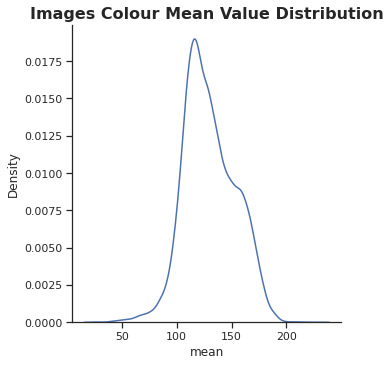

In [28]:
ax = sns.displot(data = df, x = 'mean', kind="kde");
plt.title('Images Colour Mean Value Distribution', fontsize = 16,weight = 'bold');

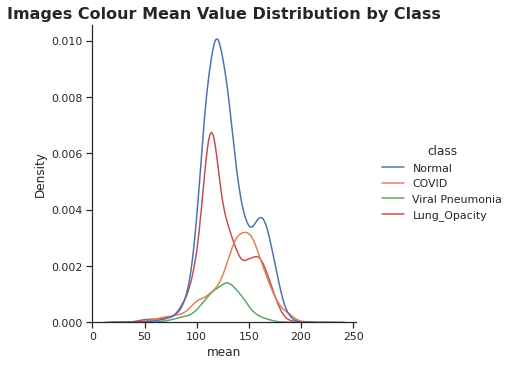

In [29]:
ax = sns.displot(data = df, x = 'mean', kind="kde", hue = 'class');
plt.title('Images Colour Mean Value Distribution by Class', fontsize = 16,weight = 'bold');

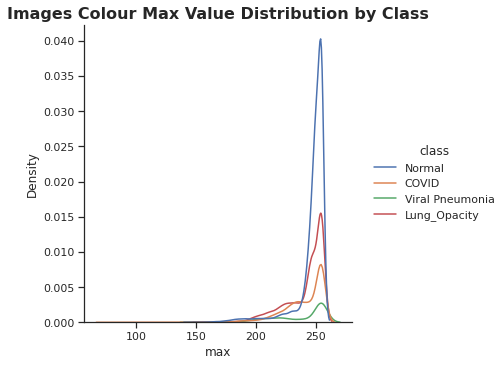

In [30]:
ax = sns.displot(data = df, x = 'max', kind="kde", hue = 'class');
plt.title('Images Colour Max Value Distribution by Class', fontsize = 16,weight = 'bold');

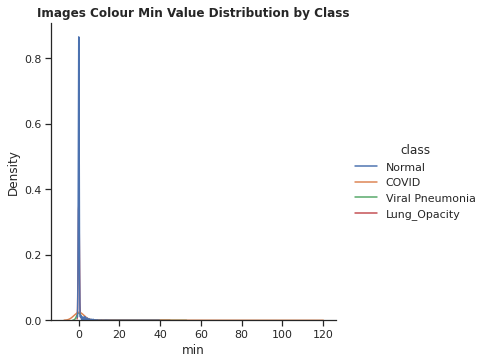

In [32]:
ax = sns.displot(data = df, x = 'min', kind="kde", hue = 'class');
plt.title('Images Colour Min Value Distribution by Class', fontsize = 12,weight = 'bold');

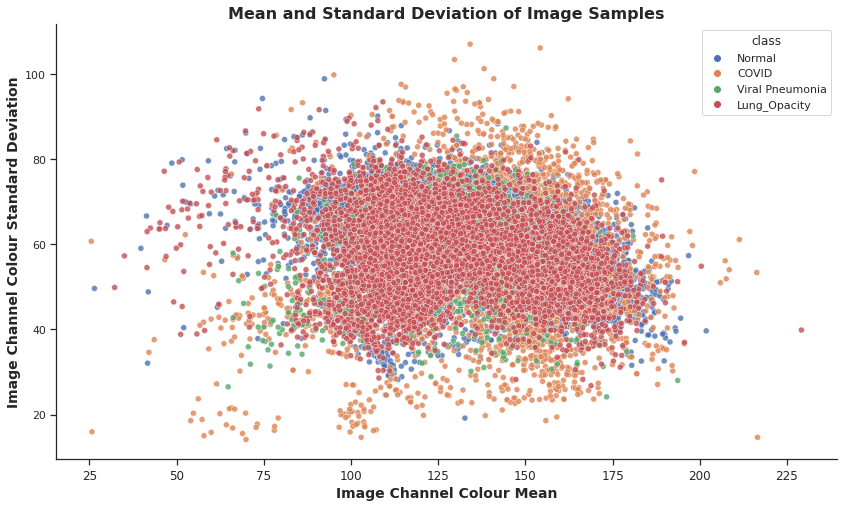

In [33]:
plt.figure(figsize=(14,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.scatterplot(data=df, x="mean", y=df['std'], hue = 'class',alpha=0.8);
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Image Channel Colour Mean',fontsize = 14,weight = 'bold')
ax.set_ylabel('Image Channel Colour Standard Deviation',fontsize = 14,weight = 'bold')
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16,weight = 'bold');

<Figure size 1008x576 with 0 Axes>

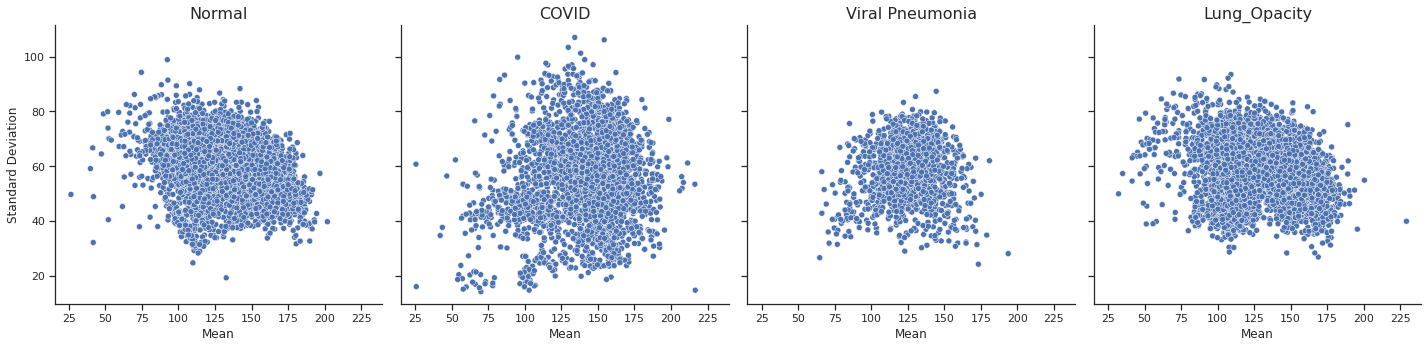

In [35]:
plt.figure(figsize=(14,8))
g = sns.FacetGrid(df, col="class",height=5);
g.map_dataframe(sns.scatterplot, x='mean', y='std',hue = 'class');
g.set_titles(col_template="{col_name}", row_template="{row_name}", size = 16)
g.fig.subplots_adjust(top=.7)
# g.fig.suptitle('Mean and Standard Deviation of Image Samples',fontsize=16, weight = 'bold')
axes = g.axes.flatten()
axes[0].set_ylabel('Standard Deviation');
for ax in axes:
    ax.set_xlabel('Mean')
g.fig.tight_layout()
plt.show()

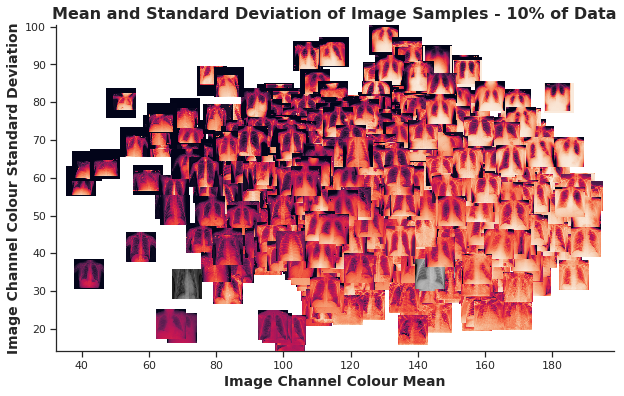

In [38]:
def getImage(path):
    imdata = plt.imread(path)
    return OffsetImage(imdata,zoom = 0.1)

DF_sample = df.sample(frac=0.1, replace=False, random_state=1)
paths = DF_sample['path']

fig, ax = plt.subplots(figsize=(10,6))
ab = sns.scatterplot(data=DF_sample, x="mean", y='std')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Image Channel Colour Mean',fontsize = 14,weight = 'bold')
ax.set_ylabel('Image Channel Colour Standard Deviation',fontsize = 14,weight = 'bold')
plt.title('Mean and Standard Deviation of Image Samples - 10% of Data', fontsize = 16,weight = 'bold');

for x0, y0, path in zip(DF_sample['mean'], DF_sample['std'],paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [ ]:
os.mkdir('dataset')
test_path = '/content/dataset/test'
path  =  '/content/dataset/'
os.mkdir(test_path)
base = '/content/COVID-19_Radiography_Dataset'
paths   = os.listdir(base)

In [ ]:
# We are creating the test directories
for k in range(len(paths)):
    if os.path.isdir(os.path.join(base,paths[k])):
        os.mkdir(os.path.join(test_path,paths[k]))

In [ ]:
# We are creating our test set
if os.path.isdir(path) is True:
    paths   = os.listdir(base)
    pr =  0.1
    for k in range(len(paths)):
        if os.path.isdir(os.path.join(base,paths[k])):
          # We are moving 2% of the sample dataset to test

          n = np.int(len(os.listdir(os.path.join(base,paths[k]))) * pr)
          # print(random.sample(glob.glob(os.path.join(base,paths[k]+'/'+paths[k]+'*')),n))
          for c in random.sample(glob.glob(os.path.join(base,paths[k]+'/'+paths[k]+'*')),n):
            shutil.move(c,os.path.join(test_path,paths[k]))

In [ ]:
CLASSES  = os.listdir(test_path) #['Normal', 'Lung_Opacity', 'COVID', 'Viral Pneumonia']

In [ ]:
CLASSES

['Normal', 'COVID', 'Viral Pneumonia', 'Lung_Opacity']

### Reading Dataset

In [ ]:
# help(ImageDataGenerator)

In [ ]:
datapath  = '/content/COVID-19_Radiography_Dataset'


In [ ]:
# augmentation parameters
# you can use preprocessing_function instead of rescale in all generators
# if you are using a pretrained network
train_augmentation_parameters = dict(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.2,
    fill_mode='nearest',
    # crop_and_pad=0.25,
    shear_range=16.0,
    validation_split = 0.2
)


classes=["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

# valid_augmentation_parameters = dict(
#     rescale=1.0/255.0
# )

test_augmentation_parameters = dict(
    rescale=1.0/255.0
)

# training parameters
NUM_CLASSES = 4
BATCH_SIZE = 32
CLASS_MODE = 'categorical'
# CLASS_MODE = 'binary'
COLOR_MODE = 'grayscale'
TARGET_SIZE = (128, 128)
EPOCHS = 100
SEED = 214

# Using the training phase generators 
train_datagen = ImageDataGenerator(**train_augmentation_parameters)


train_generator = train_datagen.flow_from_directory(
  datapath,#+"/train",
  target_size=TARGET_SIZE,
  batch_size=BATCH_SIZE,
  class_mode=CLASS_MODE,
  subset="training"
)


valid_generator = train_datagen.flow_from_directory(
  datapath,#+"/train",
  target_size=TARGET_SIZE,
  batch_size=BATCH_SIZE,
  class_mode=CLASS_MODE,
  subset="validation"
)

print()
print(np.bincount(train_generator.classes))
print(np.bincount(valid_generator.classes))

Found 15241 images belonging to 4 classes.
Found 3809 images belonging to 4 classes.

[2604 4329 7339  969]
[ 651 1082 1834  242]


In [ ]:
# valid_generator.class_indices
np.unique(valid_generator.classes)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
# help(np.bincount) # the documentation
# type(np.bincount) # Show the type
# dir(np.bincount) # list of the methods and attributes of the object 

### Transfer learning 

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, DenseNet121, InceptionV3, Xception
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.constraints import maxnorm
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical

In [ ]:
def print_layers(model):
  for idx, layer in enumerate(model.layers):
    print("layer {}: {}, trainable: {}".format(idx, layer.name, layer.trainable))


K.clear_session()

# base_model = VGG16(weights='imagenet', include_top=False, input_shape=TARGET_SIZE+(3,) )
# base_model = VGG16(weights='weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=TARGET_SIZE+(3,))

# base_model = VGG16(weights='imagenet', include_top=False, input_shape=TARGET_SIZE+(3,))

# base_model = VGG19(weights='weights/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=TARGET_SIZE+(3,))
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=TARGET_SIZE+(3,))
# base_model = DenseNet121( weights='weights/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=TARGET_SIZE+(3,))
# base_model = InceptionV3(weights='weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=TARGET_SIZE+(3,))
# can also try other architectures


x = base_model.output
x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.1)(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.1)(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.1)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.1)(x)

x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# print(model.summary())

# for layer in model.layers[0:-14]:
#     layer.trainable = False
  
# print_layers(model)


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.optimizers import SGD

optim_params = dict(
    learning_rate = 0.0001,
    momentum = 0.9394867962846013,
    decay = 0.0001
)

model.compile(
  loss='categorical_crossentropy',
  optimizer=SGD(**optim_params),
  metrics=['accuracy'])

model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard

check_point= ModelCheckpoint(
    # 'model_v2.best.h5', 
    'weighted_model_v2.best.h5', 
    monitor='val_loss', verbose=1, 
    save_best_only=True, save_weights_only=False, save_freq=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001
)

early_stop= EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, patience=11, verbose=1, restore_best_weights=True
)


In [ ]:
from sklearn.utils import class_weight

# y_labels = np.argmax(y_train, axis=1)
y_labels = train_generator.classes
classweight = class_weight.compute_class_weight('balanced', np.unique(y_labels), y_labels)

classweight_dict = {}
for i in range(len(classweight)):
  classweight_dict[i] = classweight[i]

print(classweight_dict)

import numpy as np
print(np.bincount(train_generator.classes))
# weight_for_0 = (1 / neg)*(total)/2.0 
# weight_for_1 = (1 / pos)*(total)/2.0

{0: 1.4632296466973886, 1: 0.8801686301686301, 2: 0.5191783621746832, 3: 3.9321465428276574}
[2604 4329 7339  969]


In [ ]:
# class_weight=classweight_dict,
#  callbacks=[check_point, early_stop, reduce_lr]
hist = model.fit(
    train_generator, 
    validation_data=valid_generator, 
    epochs=EPOCHS
)

Epoch 1/100
477/477 [==============================] - 163s 263ms/step - loss: 1.1005 - accuracy: 0.6708 - val_loss: 4.7975 - val_accuracy: 0.2812
Epoch 2/100
477/477 [==============================] - 124s 260ms/step - loss: 0.5664 - accuracy: 0.8271 - val_loss: 1.7781 - val_accuracy: 0.4896
Epoch 3/100
477/477 [==============================] - 124s 261ms/step - loss: 0.4609 - accuracy: 0.8599 - val_loss: 0.6916 - val_accuracy: 0.8076
Epoch 4/100
477/477 [==============================] - 125s 261ms/step - loss: 0.4460 - accuracy: 0.8588 - val_loss: 1.1853 - val_accuracy: 0.6668
Epoch 5/100
477/477 [==============================] - 124s 259ms/step - loss: 0.3818 - accuracy: 0.8797 - val_loss: 0.5414 - val_accuracy: 0.8131
Epoch 6/100
477/477 [==============================] - 123s 258ms/step - loss: 0.3306 - accuracy: 0.8866 - val_loss: 0.5921 - val_accuracy: 0.8099
Epoch 7/100
477/477 [==============================] - 122s 256ms/step - loss: 0.3093 - accuracy: 0.8932 - val_loss: 0

In [ ]:
import pandas as pd
train_hist = pd.DataFrame(hist.history)
train_hist.to_csv('/content/figures/train_history.csv',index=False)

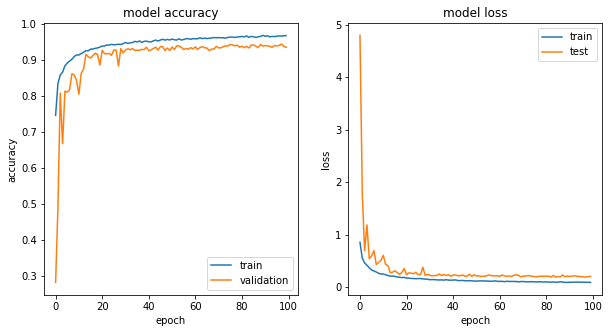

In [ ]:
def plot_acc_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 

plot_acc_loss(hist)

In [ ]:
fig = plt.figure(figsize=(8,6),dpi=150)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.savefig('/content/figures/train_val_accuracy.png',dpi=300)
# plt.show()

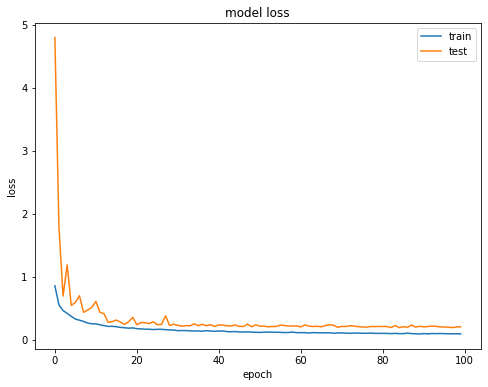

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('/content/figures/train_val_loss.png',dpi=300)

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/Research


In [ ]:
#Save/Load model
model.save("models/ResNet50.model.h5")
# model= load_model('weighted_model_v2.best.h5')

In [ ]:
model.save_weights("models/ResNet50.weights.model.h5")

In [ ]:
testpath  = '/content/dataset/test'

In [ ]:
# Test data generator
test_datagen = ImageDataGenerator(**test_augmentation_parameters)
test_generator = test_datagen.flow_from_directory(
  testpath,
  target_size=TARGET_SIZE,
  batch_size=BATCH_SIZE,
  class_mode=CLASS_MODE,
  shuffle=False,
)
print(np.bincount(test_generator.classes), "\n")

Found 2115 images belonging to 4 classes.
[ 361  601 1019  134] 



In [ ]:
score = model.evaluate(test_generator, verbose=0)
print('Model Loss: {}, Accuracy: {}'.format(score[0], score[1]))

Model Loss: 0.2027854472398758, Accuracy: 0.9399527311325073


In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


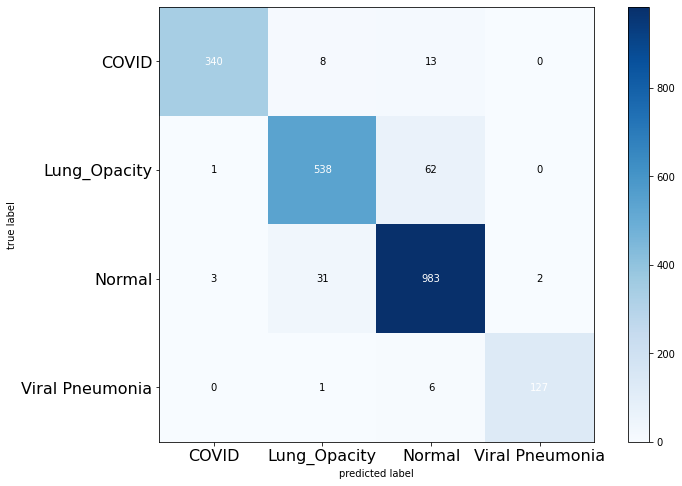

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#Predic
y_pred = model.predict_generator(generator=test_generator)
# print(y_pred[:10])
# to get the prediction, we pick the class with with the highest probability
y_pred_classes = np.argmax(y_pred, axis = 1) 
# y_true = np.argmax(y_val, axis = 1) 
y_true = test_generator.classes

conf_mtx = confusion_matrix(y_true, y_pred_classes) 
plot_confusion_matrix(conf_mtx, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues,colorbar=True)
plt.xticks(range(4), ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'], fontsize=16)
plt.yticks(range(4), ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'], fontsize=16)
plt.savefig('/content/figures/test_confusion_matrix.png',dpi=300)
plt.show()

In [ ]:
CLASSES

['Normal', 'COVID', 'Viral Pneumonia', 'Lung_Opacity']

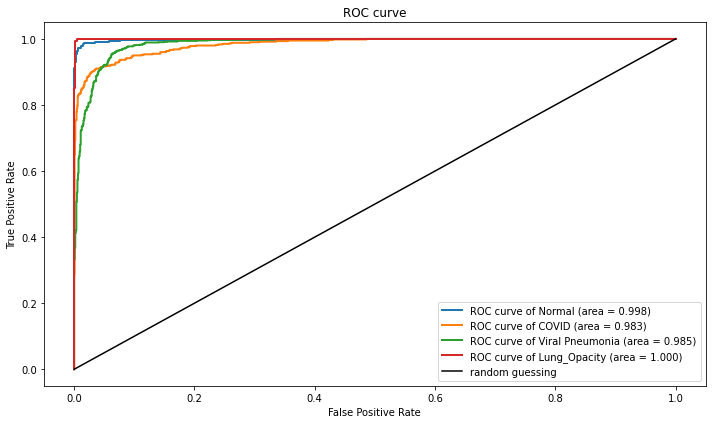

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = to_categorical(test_generator.classes) 

for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# for i in range(1):
#     fpr[i], tpr[i], _ = roc_curve(y_true, y_pred)
#     roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))

for i in range(NUM_CLASSES):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of {0} (area = {1:0.3f})'.format(CLASSES[i], roc_auc[i]))

# for i in range(1):
#     plt.plot(fpr[i], tpr[i], lw=2,
#              label='ROC curve (area = {:0.3f})'.format(roc_auc[i]))


plt.plot(fpr[0], fpr[0], 'k-', label = 'random guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.savefig('/content/figures/roc_curve.png',dpi=300)

In [ ]:
# def testplots(x_test, y_test, y_pred, fsize=(14, 12),  nrows=3, ncols=3, ax_off=True):
#     fig = plt.figure(figsize=fsize, dpi=100)
#     patient_state = np.where(y_test==1)[1]
#     for i in range(nrows * ncols):
#         ax = fig.add_subplot(nrows, ncols, i + 1)
#         ax.imshow(x_test[i], cmap='jet')        
#         if patient_state[i] == 0:
#             ax.set_title(r'Normal: {0:.2f} %'.format(y_pred[i,0]), fontsize=15)            
#         else:
#             ax.set_title(r'Pneumonia: {0:.2f} %'.format(y_pred[i,1]), fontsize=15)
#         if ax_off: 
#             ax.set_axis_off()

#     plt.tight_layout()
# #     plt.subplots_adjust(wspace=.01, hspace=.01) 
# #     return fig

# testplots(X_val, y_val, y_pred, fsize=(14, 12),  nrows=3, ncols=3, ax_off=True)

In [ ]:
!zip -r figures.zip figures

  adding: figures/ (stored 0%)
  adding: figures/test_confusion_matrix.png (deflated 27%)
  adding: figures/train_history.csv (deflated 55%)
  adding: figures/roc_curve.png (deflated 17%)
  adding: figures/train_val_accuracy.png (deflated 18%)
  adding: figures/train_val_loss.png (deflated 22%)
  adding: figures/train_val_accuracy (deflated 28%)
